In [2]:
import tensorflow as tf

In [3]:
from skimage.io import imread

In [4]:
im = imread('zebra.jpg')

In [5]:
import matplotlib.pyplot as plt

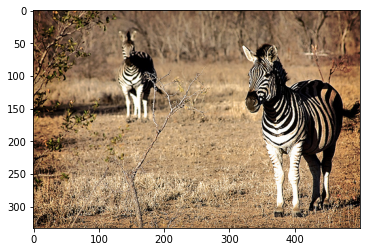

In [6]:
plt.imshow(im)

In [7]:
import numpy as np

In [9]:
bbs = np.array([[120,25,200,165], [300,50,480,320]])

In [10]:
import matplotlib.patches as pt

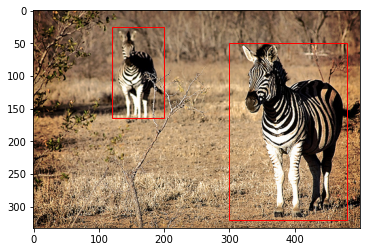

In [12]:
fig, ax = plt.subplots()
ax.imshow(im)
for i in bbs:
    ax.add_patch(pt.Rectangle((i[0],i[1]),i[2]-i[0],i[3]-i[1], fill=None, color='red'))

In [15]:
# %pip install -U opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.0/30.0 MB 49.2 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [16]:
import cv2

In [17]:
im2 = cv2.imread('zebra.jpg')

In [18]:
im2 = im2[...,::-1]

In [19]:
im2_ = im2.copy()

In [20]:
for i in bbs:
    cv2.rectangle(im2_, (i[0],i[1]), (i[2],i[3]), color=(255,0,0))

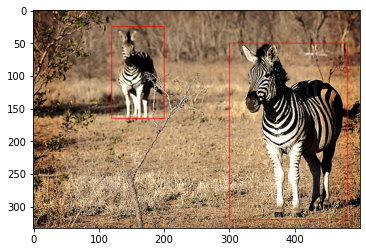

In [21]:
plt.imshow(im2_)

In [24]:
im2.shape

(333, 500, 3)

In [22]:
im3 = cv2.resize(im2, (800,800))

In [25]:
800/333

2.4024024024024024

In [26]:
800/500

1.6

In [23]:
im3.shape

(800, 800, 3)

In [27]:
im2.shape[0]/im3.shape[0]

500

In [66]:
bbs2 = bbs.copy()

In [67]:
bbs2

array([[120,  25, 200, 165],
       [300,  50, 480, 320]])

In [68]:
bbs2[:,0] = bbs2[:,0]*im3.shape[1]/im2.shape[1]
bbs2[:,1] = bbs2[:,1]*im3.shape[0]/im2.shape[0]
bbs2[:,2] = bbs2[:,2]*im3.shape[1]/im2.shape[1]
bbs2[:,3] = bbs2[:,3]*im3.shape[0]/im2.shape[0]

In [69]:
bbs2

array([[192,  60, 320, 396],
       [480, 120, 768, 768]])

In [33]:
bbs2[:,0] = bbs2[:,0]*800/500
bbs2[:,1] = bbs2[:,1]*800/300
bbs2[:,2] = bbs2[:,2]*800/500
bbs2[:,3] = bbs2[:,3]*800/300

In [35]:
bbs2

array([[192,  66, 320, 440],
       [480, 133, 768, 853]])

In [36]:
im3.shape

(800, 800, 3)

In [74]:
im3_ = im3.copy()

In [75]:
for i in bbs2:
    cv2.rectangle(im3_,(i[0],i[1]), (i[2],i[3]), color=(255,0,0), thickness=3)

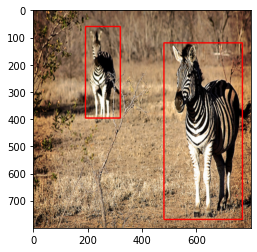

In [76]:
plt.imshow(im3_)

In [ ]:
# VGG

In [42]:
vgg = tf.keras.applications.VGG16(include_top=False)

Metal device set to: Apple M1


2022-08-11 20:05:16.587170: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-08-11 20:05:16.587590: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [44]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [45]:
len(vgg.layers) # input 1개, MaxPlooing 5개 제외 13 layers 

19

In [46]:
im3.shape

(800, 800, 3)

In [47]:
vgg(im3[tf.newaxis])

<tf.Tensor: shape=(1, 25, 25, 512), dtype=float32, numpy=
array([[[[ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.14235538, ...,  0.        ,
           0.        ,  0.        ],
         ...,
         [ 0.        ,  0.        ,  0.72310966, ...,  0.        ,
           2.1115327 ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           3.5494702 ,  0.        ],
         [ 0.        ,  0.        ,  2.5827112 , ...,  0.        ,
           1.2787983 ,  0.        ]],

        [[ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0. 

In [51]:
from tensorflow.keras.backend import function

In [52]:
o = function([vgg.layers[0].input], [vgg.layers[0].output])

In [53]:
o(im3)[0].shape

(800, 800, 3)

In [55]:
for l in vgg.layers:
    o = function([vgg.layers[0].input], [l.output])
    print(o(im3[tf.newaxis])[0].shape)

(1, 800, 800, 3)
(1, 800, 800, 64)
(1, 800, 800, 64)
(1, 400, 400, 64)
(1, 400, 400, 128)
(1, 400, 400, 128)
(1, 200, 200, 128)
(1, 200, 200, 256)
(1, 200, 200, 256)
(1, 200, 200, 256)
(1, 100, 100, 256)
(1, 100, 100, 512)
(1, 100, 100, 512)
(1, 100, 100, 512)
(1, 50, 50, 512)
(1, 50, 50, 512)
(1, 50, 50, 512)
(1, 50, 50, 512)
(1, 25, 25, 512)


In [72]:
model = tf.keras.Model(vgg.layers[0].input, vgg.layers[-2].output)

In [73]:
model.summary()

Model: "model_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0  

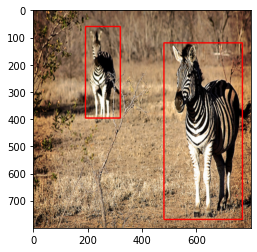

In [77]:
plt.imshow(im3_)

In [78]:
800/16

50.0

In [79]:
800/50 # 800 의 50 이면 16칸 거기에 중점은 8

16.0

In [82]:
x = np.arange(8, 800, 16) # 중점 8
y = np.arange(8, 800, 16)

In [83]:
x

array([  8,  24,  40,  56,  72,  88, 104, 120, 136, 152, 168, 184, 200,
       216, 232, 248, 264, 280, 296, 312, 328, 344, 360, 376, 392, 408,
       424, 440, 456, 472, 488, 504, 520, 536, 552, 568, 584, 600, 616,
       632, 648, 664, 680, 696, 712, 728, 744, 760, 776, 792])

In [93]:
center = np.array(np.meshgrid(x,y)).T.reshape(-1,2)

In [94]:
center

array([[  8,   8],
       [  8,  24],
       [  8,  40],
       ...,
       [792, 760],
       [792, 776],
       [792, 792]])

In [96]:
len(center)

2500

In [95]:
im4 = im3.copy()

In [98]:
for i in range(2500):
    cv2.circle(im4, (center[i][0], center[i][1]), 1, (0,255,0), thickness=5)

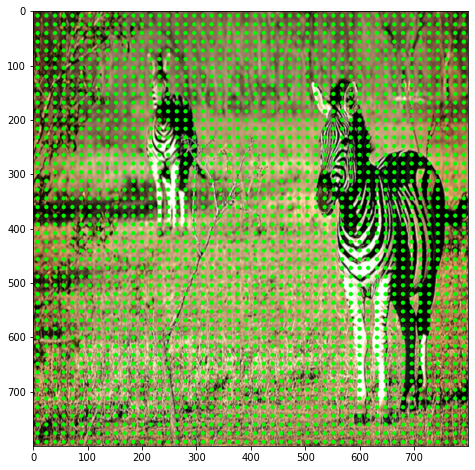

In [116]:
plt.figure(figsize=(8,8))
plt.imshow(im4)

In [102]:
anchor_ratio = [0.5, 1,  2]
anchor_scale = [8,  16, 32]

In [117]:
anchor_list = np.zeros((2500*9,4), dtype=np.int32)

In [118]:
for i, c in enumerate(center):
    c_x, c_y = c[0], c[1]
    for r in anchor_ratio:
        for s in anchor_scale:
            h = pow(pow(s,2)/r, 0.5)
            w = h*r
            h *= 16
            w *= 16
            anchor_list[i] = [int(c_x-0.5*w), int(c_y-0.5*h), int(c_x+0.5*w), int(c_y+0.5*h)]

In [119]:
270*9

2430

In [125]:
anchor_list[2430]

array([ 413,  306, 1138,  669], dtype=int32)

In [120]:
im5 = im4.copy()

In [122]:
for i in range(2430, 2439):
    cv2.rectangle(im5, (anchor_list[i][0],anchor_list[i][1]), 
                       (anchor_list[i][2],anchor_list[i][3]), color=(0,0,255), thickness=3)

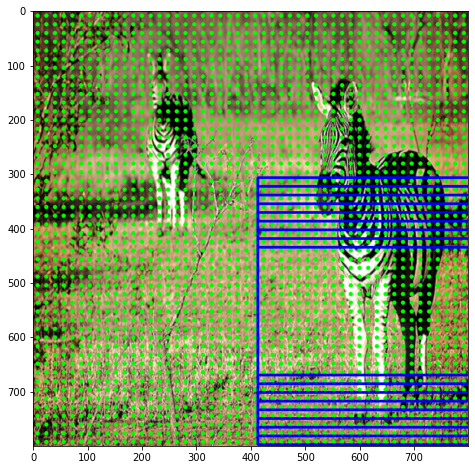

In [124]:
plt.figure(figsize=(8,8))
plt.imshow(im5)

In [85]:
np.array(np.meshgrid(x,y)).reshape(-1,2)

array([[  8,  24],
       [ 40,  56],
       [ 72,  88],
       ...,
       [792, 792],
       [792, 792],
       [792, 792]])

In [ ]:
# reference

In [88]:
a = np.arange(0,5)
b = np.arange(0,5)

In [89]:
np.meshgrid(a,b)[0]+np.meshgrid(a,b)[1]

array([[0, 1, 2, 3, 4],
       [1, 2, 3, 4, 5],
       [2, 3, 4, 5, 6],
       [3, 4, 5, 6, 7],
       [4, 5, 6, 7, 8]])

In [90]:
np.ogrid[0:5,0:5][0] + np.ogrid[0:5,0:5][1]

array([[0, 1, 2, 3, 4],
       [1, 2, 3, 4, 5],
       [2, 3, 4, 5, 6],
       [3, 4, 5, 6, 7],
       [4, 5, 6, 7, 8]])

In [91]:
np.mgrid[0:5,0:5]

array([[[0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3],
        [4, 4, 4, 4, 4]],

       [[0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4]]])